In [1]:
import re
import json
import pickle
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
sns.set()
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'dataset\train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


## Prepocessing report:

In [4]:
profile = ProfileReport(df)
profile.to_file('pre.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning:
Converting `'NaN '` variable into `np.nan`

In [5]:
df = df.replace('NaN ', np.nan)
df = df.dropna()

In [6]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

Drop unwanted Columns:

In [7]:
df = df.drop([
    'ID', 
    'Delivery_person_ID',
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude'
    ], axis=1)

In [8]:
df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Delivery_person_Age      41368 non-null  object
 1   Delivery_person_Ratings  41368 non-null  object
 2   Order_Date               41368 non-null  object
 3   Time_Orderd              41368 non-null  object
 4   Time_Order_picked        41368 non-null  object
 5   Weatherconditions        41368 non-null  object
 6   Road_traffic_density     41368 non-null  object
 7   Vehicle_condition        41368 non-null  int64 
 8   Type_of_order            41368 non-null  object
 9   Type_of_vehicle          41368 non-null  object
 10  multiple_deliveries      41368 non-null  object
 11  Festival                 41368 non-null  object
 12  City                     41368 non-null  object
 13  Time_taken(min)          41368 non-null  object
dtypes: int64(1), object(13)
memory usage: 

(Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Order_Date',
        'Time_Orderd', 'Time_Order_picked', 'Weatherconditions',
        'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
        'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
        'Time_taken(min)'],
       dtype='object'),
 None)

Unique values of each columns:

In [9]:
for i in df.columns:
    print(f'{i}:')
    print(df[i].unique())
    print('----------------------------')

Delivery_person_Age:
['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' '28' '39' '30']
----------------------------
Delivery_person_Ratings:
['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5' '3.8'
 '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '3.2' '3.3' '3.4' '2.8' '2.9'
 '3']
----------------------------
Order_Date:
['19-03-2022' '25-03-2022' '05-04-2022' '26-03-2022' '11-03-2022'
 '04-03-2022' '14-03-2022' '20-03-2022' '12-02-2022' '13-02-2022'
 '14-02-2022' '02-04-2022' '01-03-2022' '16-03-2022' '15-02-2022'
 '10-03-2022' '27-03-2022' '12-03-2022' '01-04-2022' '05-03-2022'
 '11-02-2022' '08-03-2022' '03-04-2022' '30-03-2022' '28-03-2022'
 '18-03-2022' '04-04-2022' '24-03-2022' '09-03-2022' '02-03-2022'
 '13-03-2022' '29-03-2022' '31-03-2022' '17-03-2022' '07-03-2022'
 '15-03-2022' '16-02-2022' '18-02-2022' '23-03-2022' '03-03-2022'
 '06-03-2022' '21-03-2022' '06-04-2022' '17-02-2022']
----------------------------
Time_Orderd:
['1

Cleaning:

In [10]:
df.Delivery_person_Age = df.Delivery_person_Age.astype(int)
df.Delivery_person_Ratings = df.Delivery_person_Ratings.astype(float)
def dateconv(x):
    date = list(map(int, x.split('-')))
    return dt.date(day=date[0], month=date[1], year=date[2])
df.Order_Date = df.Order_Date.apply(dateconv)
def timeconv(x):
    time = list(map(int, x.split(':')))
    return dt.time(hour=time[0], minute=time[1], second=time[2])
df.Time_Orderd = df.Time_Orderd.apply(timeconv)
df.Time_Order_picked = df.Time_Order_picked.apply(timeconv)
df.Weatherconditions = df.Weatherconditions.apply(lambda x: x.split(' ')[1])
df.Vehicle_condition = df.Vehicle_condition.astype(int)
df.multiple_deliveries = df.multiple_deliveries.astype(int)
def festival(x):
    if x == 'No ':
        return 0
    else:
        return 1
df.Festival = df.Festival.apply(festival)
df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(re.findall('[\d]+', x)[0]))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      41368 non-null  int32  
 1   Delivery_person_Ratings  41368 non-null  float64
 2   Order_Date               41368 non-null  object 
 3   Time_Orderd              41368 non-null  object 
 4   Time_Order_picked        41368 non-null  object 
 5   Weatherconditions        41368 non-null  object 
 6   Road_traffic_density     41368 non-null  object 
 7   Vehicle_condition        41368 non-null  int32  
 8   Type_of_order            41368 non-null  object 
 9   Type_of_vehicle          41368 non-null  object 
 10  multiple_deliveries      41368 non-null  int32  
 11  Festival                 41368 non-null  int64  
 12  City                     41368 non-null  object 
 13  Time_taken(min)          41368 non-null  int64  
dtypes: float64(1), int32(3

In [12]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,0,Urban,24
1,34,4.5,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,0,Metropolitian,33
2,23,4.4,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,0,Urban,26
3,38,4.7,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,0,Metropolitian,21
4,32,4.6,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,0,Metropolitian,30


## Post processing report:

In [13]:
profile = ProfileReport(df)
profile.to_file('post.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Seaborn pairplot:

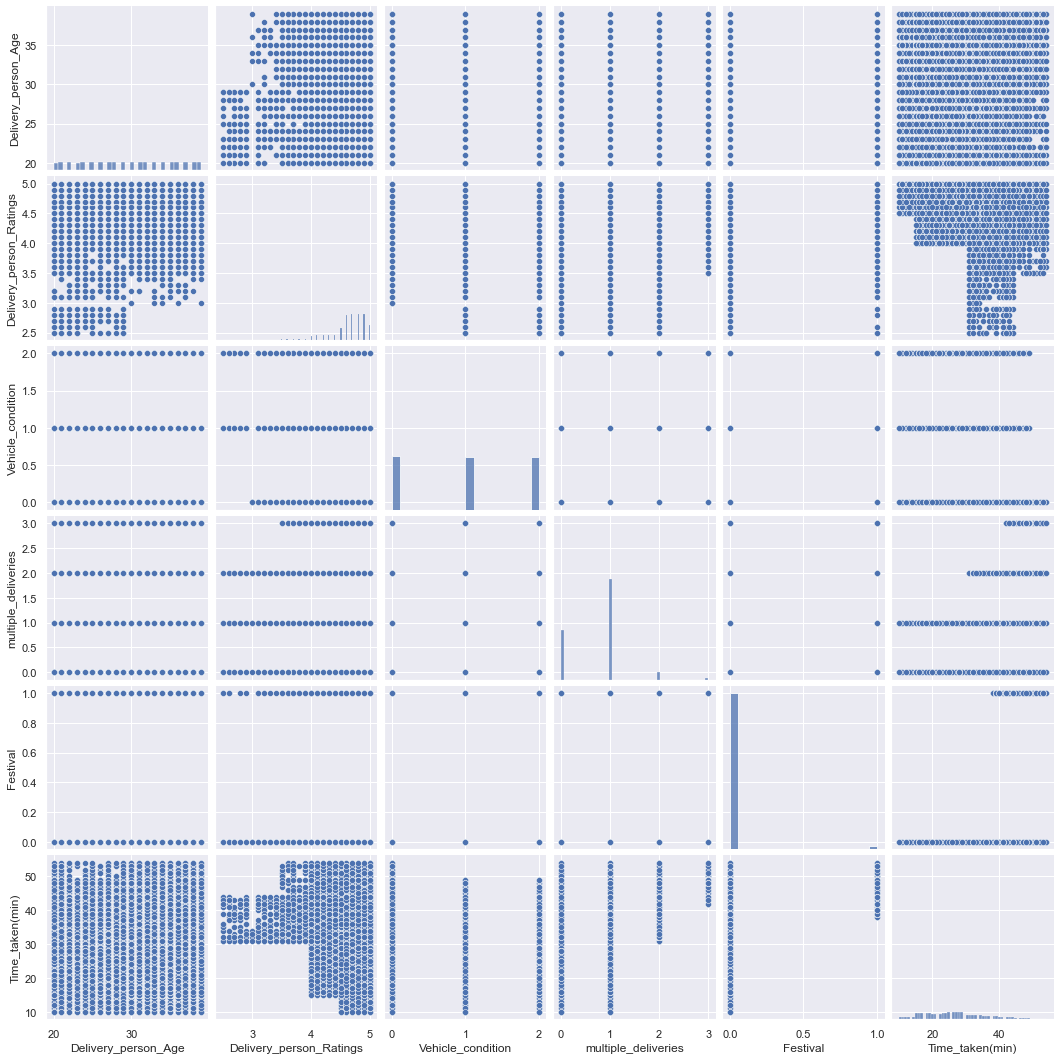

In [14]:
sns.pairplot(df);

## Group By Delivery_person_Age:

In [15]:
df1 = df.groupby('Delivery_person_Age').mean()
df1

,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min)
Delivery_person_Age,,,,,
20,4.679129,1.007007,0.665666,0.010511,23.165666
21,4.680453,0.968488,0.671098,0.010340,23.240768
22,4.670381,0.993247,0.682586,0.010613,23.246503
23,4.683037,0.997461,0.683596,0.008126,23.510411
24,4.673917,1.024818,0.654501,0.014599,23.428710
25,4.669406,0.986139,0.672277,0.007921,23.181683
26,4.676093,1.000497,0.665507,0.009940,23.273857
27,4.674181,0.982622,0.665839,0.011420,23.315293
28,4.683609,0.994163,0.685798,0.009728,23.437257


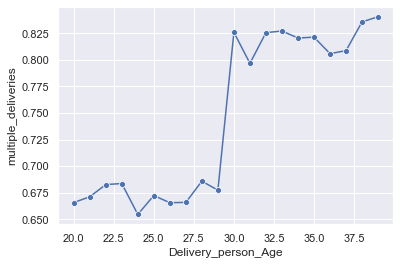

In [16]:
sns.lineplot(df1.index, df1.multiple_deliveries, marker='o');

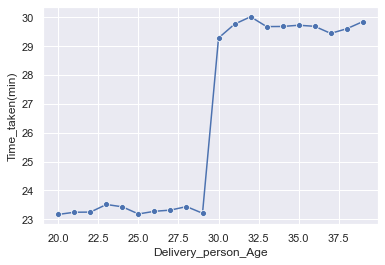

In [17]:
sns.lineplot(df1.index, df1['Time_taken(min)'], marker='o');

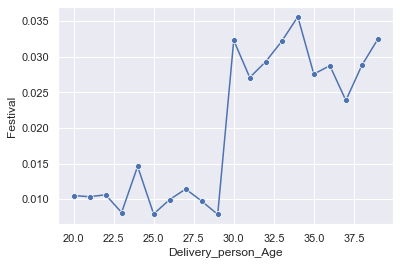

In [18]:
sns.lineplot(df1.index, df1['Festival'], marker='o');

## Group By City:

In [19]:
df2 = df.groupby('City').mean()
df2

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min)
City,,,,,,
Metropolitian,29.796367,4.623166,0.979385,0.767645,0.021526,27.429860
Semi-Urban,32.565789,4.492105,0.217105,1.467105,0.256579,49.710526
Urban,28.930913,4.669512,1.064403,0.670428,0.011603,23.209495


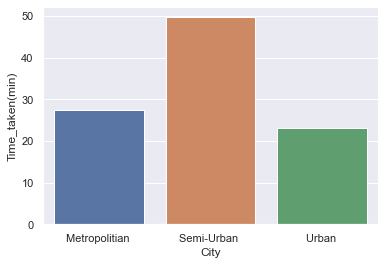

In [20]:
sns.barplot(df2.index, df2['Time_taken(min)']);

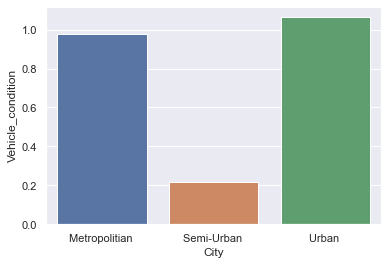

In [21]:
sns.barplot(df2.index, df2['Vehicle_condition']);

In [22]:
df3 = df.groupby('City').count()['Delivery_person_Age'].to_frame()
df3.columns = ['Count']
df3

,Count
City,
Metropolitian,31822
Semi-Urban,152
Urban,9394


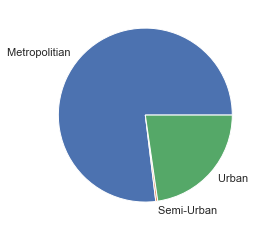

In [23]:
plt.pie(x=df3.Count, labels=df3.index);

## Group By Type_of_order:

In [24]:
df4 = df.groupby('Type_of_order').mean()
df4

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min)
Type_of_order,,,,,,
Buffet,29.679836,4.634706,0.993350,0.743986,0.019460,26.540974
Drinks,29.577072,4.630877,1.000097,0.754999,0.019996,26.464085
Meal,29.633720,4.630688,0.985798,0.754342,0.019000,26.670281
Snack,29.550341,4.636568,1.004319,0.739226,0.022075,26.536808


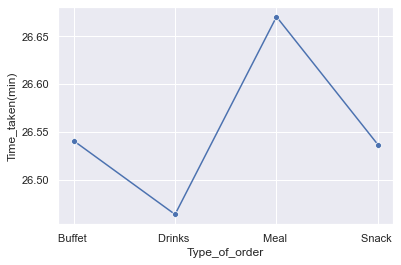

In [25]:
sns.lineplot(df4.index, df4['Time_taken(min)'], marker='o');

## Group By Type_of_vehicle:

In [26]:
df5 = df.groupby('Type_of_vehicle').mean()
df5

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min)
Type_of_vehicle,,,,,,
electric_scooter,29.680120,4.648281,2.000000,0.700149,0.008670,24.587145
motorcycle,29.607613,4.626473,0.568313,0.783374,0.026955,27.843210
scooter,29.597173,4.641463,1.508271,0.697442,0.010858,24.748597


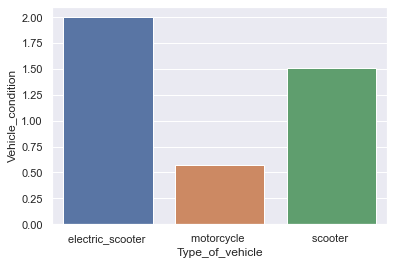

In [27]:
sns.barplot(df5.index, df5['Vehicle_condition']);

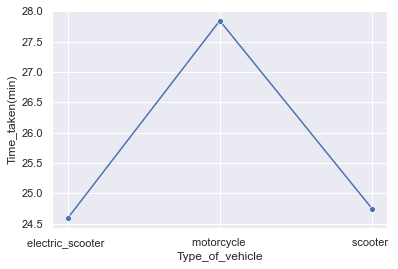

In [28]:
sns.lineplot(df5.index, df5['Time_taken(min)'], marker='o');

## Group By Road_traffic_density:

In [29]:
df6 = df.groupby('Road_traffic_density').mean()
df6

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min)
Road_traffic_density,,,,,,
High,29.691933,4.652230,0.990982,0.774311,0.016573,27.407019
Jam,29.614712,4.594019,1.006839,0.862300,0.045596,31.395699
Low,29.618554,4.645011,0.984837,0.632501,0.003290,21.494457
Medium,29.558914,4.660138,0.998914,0.748840,0.011753,26.899556


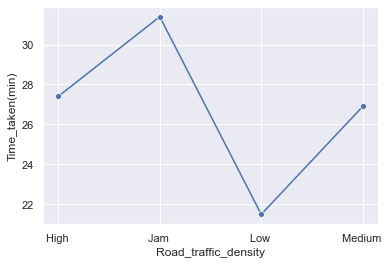

In [30]:
sns.lineplot(df6.index, df6['Time_taken(min)'], marker='o');

## Group By Weatherconditions:

In [31]:
df7 = df.groupby('Weatherconditions').mean()
df7

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min)
Weatherconditions,,,,,,
Cloudy,29.633957,4.651871,0.997122,0.806763,0.033237,29.139281
Fog,29.458685,4.652965,1.003513,0.811270,0.034429,29.174115
Sandstorms,29.613981,4.611748,0.987887,0.727379,0.012551,26.113398
Stormy,29.673860,4.611819,1.006145,0.740889,0.014864,26.110619
Sunny,29.696553,4.654868,0.993499,0.655125,0.011188,22.143484
Windy,29.590145,4.616128,0.986548,0.741044,0.013598,26.357070


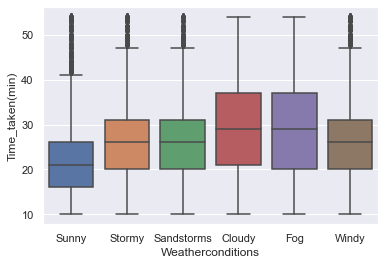

In [32]:
sns.boxplot(df['Weatherconditions'], df['Time_taken(min)']);

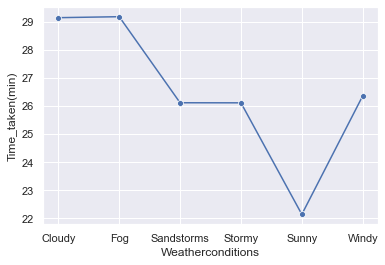

In [33]:
sns.lineplot(df7.index, df7['Time_taken(min)'], marker='o');

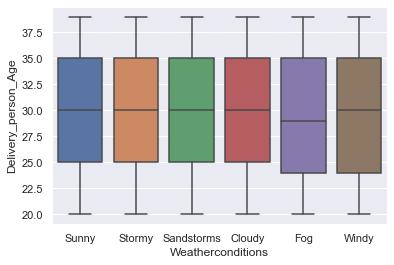

In [34]:
sns.boxplot(df['Weatherconditions'], df['Delivery_person_Age']);

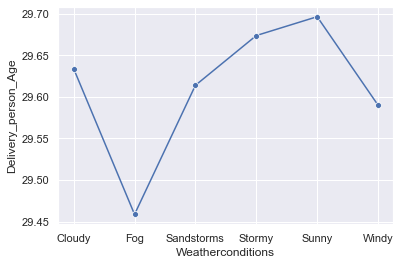

In [35]:
sns.lineplot(df7.index, df7['Delivery_person_Age'], marker='o');

## DecisionTreeRegressor:

In [36]:
from sklearn.tree import DecisionTreeRegressor

Take required columns:

In [39]:
df8 = df[['Delivery_person_Age', 'Delivery_person_Ratings',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)']]

In [40]:
df8.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)'],
      dtype='object')

Unique elements of each columns:

In [42]:
for i in df8.columns:
    print(f'{i}:')
    print(df[i].unique())
    print('------------------------------------')

Delivery_person_Age:
[37 34 23 38 32 22 33 35 36 21 24 29 25 31 27 26 20 28 39 30]
------------------------------------
Delivery_person_Ratings:
[4.9 4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.1 5.  3.5 3.8 3.9 3.7 2.6 2.5 3.6
 3.1 2.7 3.2 3.3 3.4 2.8 2.9 3. ]
------------------------------------
Weatherconditions:
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
------------------------------------
Road_traffic_density:
['High ' 'Jam ' 'Low ' 'Medium ']
------------------------------------
Vehicle_condition:
[2 0 1]
------------------------------------
Type_of_order:
['Snack ' 'Drinks ' 'Buffet ' 'Meal ']
------------------------------------
Type_of_vehicle:
['motorcycle ' 'scooter ' 'electric_scooter ']
------------------------------------
multiple_deliveries:
[0 1 3 2]
------------------------------------
Festival:
[0 1]
------------------------------------
City:
['Urban ' 'Metropolitian ' 'Semi-Urban ']
------------------------------------
Time_taken(min):
[24 33 26 21 30 40 32 34 46 

Converting all catagorical data into numerical data:

In [43]:
Weatherconditions = {}
for i,j in enumerate(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy']):
    Weatherconditions[j] = i

Road_traffic_density = {}
for i,j in enumerate(['High ', 'Jam ', 'Low ', 'Medium ']):
    Road_traffic_density[j] = i

Type_of_order = {}
for i,j in enumerate(['Snack ', 'Drinks ', 'Buffet ', 'Meal ']):
    Type_of_order[j] = i

Type_of_vehicle = {}
for i,j in enumerate(['motorcycle ', 'scooter ', 'electric_scooter ']):
    Type_of_vehicle[j] = i

City = {}
for i,j in enumerate(['Urban ', 'Metropolitian ', 'Semi-Urban ']):
    City[j] = i

df8['Weatherconditions'] = df8['Weatherconditions'].map(Weatherconditions)
df8['Road_traffic_density'] = df8['Road_traffic_density'].map(Road_traffic_density)
df8['Type_of_order'] = df8['Type_of_order'].map(Type_of_order)
df8['Type_of_vehicle'] = df8['Type_of_vehicle'].map(Type_of_vehicle)
df8['City'] = df8['City'].map(City)

df8.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,0,0,2,0,0,0,0,0,24
1,34,4.5,1,1,2,0,1,1,0,1,33
2,23,4.4,2,2,0,1,0,1,0,0,26
3,38,4.7,0,3,0,2,0,1,0,1,21
4,32,4.6,3,0,1,0,1,1,0,1,30


DecisionTreeRegressor:

In [46]:
model = DecisionTreeRegressor()
model.fit(df8.drop('Time_taken(min)', axis=1).values, df8['Time_taken(min)'].values)

DecisionTreeRegressor()

In [ ]:
model_keys = {
    'Weatherconditions':Weatherconditions,
    'Road_traffic_density':Road_traffic_density,
    'Type_of_order':Type_of_order,
    'Type_of_vehicle':Type_of_vehicle,
    'City':City
}

In [50]:
print(json.dumps(model_keys, indent=4))

{
    "Weatherconditions": {
        "Sunny": 0,
        "Stormy": 1,
        "Sandstorms": 2,
        "Cloudy": 3,
        "Fog": 4,
        "Windy": 5
    },
    "Road_traffic_density": {
        "High ": 0,
        "Jam ": 1,
        "Low ": 2,
        "Medium ": 3
    },
    "Type_of_order": {
        "Snack ": 0,
        "Drinks ": 1,
        "Buffet ": 2,
        "Meal ": 3
    },
    "Type_of_vehicle": {
        "motorcycle ": 0,
        "scooter ": 1,
        "electric_scooter ": 2
    },
    "City": {
        "Urban ": 0,
        "Metropolitian ": 1,
        "Semi-Urban ": 2
    }
}


In [52]:
df8.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,0,0,2,0,0,0,0,0,24
1,34,4.5,1,1,2,0,1,1,0,1,33
2,23,4.4,2,2,0,1,0,1,0,0,26
3,38,4.7,0,3,0,2,0,1,0,1,21
4,32,4.6,3,0,1,0,1,1,0,1,30


In [87]:
print(model.__doc__)

A decision tree regressor.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
        The function to measure the quality of a split. Supported criteria
        are "squared_error" for the mean squared error, which is equal to
        variance reduction as feature selection criterion and minimizes the L2
        loss using the mean of each terminal node, "friedman_mse", which uses
        mean squared error with Friedman's improvement score for potential
        splits, "absolute_error" for the mean absolute error, which minimizes
        the L1 loss using the median of each terminal node, and "poisson" which
        uses reduction in Poisson deviance to find splits.

        .. versionadded:: 0.18
           Mean Absolute Error (MAE) criterion.

        .. versionadded:: 0.24
            Poisson deviance criterion.

        .. deprecated:: 1.0

In [93]:
model.__doc__ = '''
model.predict([[
    Delivery_person_Age,
    Delivery_person_Ratings,
    Weatherconditions,
    Road_traffic_density,
    Vehicle_condition,
    Type_of_order,
    Type_of_vehicle,
    multiple_deliveries,
    Festival,
    City]])

#Dictionary:
{
    "Weatherconditions": {
        "Sunny": 0,
        "Stormy": 1,
        "Sandstorms": 2,
        "Cloudy": 3,
        "Fog": 4,
        "Windy": 5
    },
    "Road_traffic_density": {
        "High ": 0,
        "Jam ": 1,
        "Low ": 2,
        "Medium ": 3
    },
    "Type_of_order": {
        "Snack ": 0,
        "Drinks ": 1,
        "Buffet ": 2,
        "Meal ": 3
    },
    "Type_of_vehicle": {
        "motorcycle ": 0,
        "scooter ": 1,
        "electric_scooter ": 2
    },
    "City": {
        "Urban ": 0,
        "Metropolitian ": 1,
        "Semi-Urban ": 2
    }
}'''

Saving model:

In [94]:
with open('deliveryModel.pickle', 'wb') as f:
    pickle.dump(model, f)